# `CREDIT CARD TOTAL SPENT PREDICTION MODEL`

1. The objective of this case study is to understand whats driving the total spend (Primary card + Secondary card).
2. Given the factors, predict credit limit for the new applicants.

### `ENVIRONMENT SETUP`

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

sns.set()

### `DATA LOAD`

In [2]:
# Reading the data into pandas df
df = pd.read_excel('DataSet.xlsx')

# Removing duplicates if any
df = df.drop_duplicates()

# Top 5 observations
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


### `DATA STRUCTURE`

In [3]:
# Checking different datatypes in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [4]:
df.shape

(5000, 130)

In [5]:
df.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,54.759600,3.699909,2.392200,9.954160,1.857326,-0.130454,3.654460,0.696915,0.23420,2.964200,0.480200,6.112800,0.641400,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,23.232580,1.389400,0.221000,0.361000,2.996200,1.973400,25.345538,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,337.202520,160.876110,0.466000,2.05860,38.204800,0.253200,13.471450,2.288779,708.871753,5.611298,0.475600,13.264450,3.243230,577.832510,6.584783,0.340800,12.991310,3.600238,470.176400,6.747296,0.716200,15.443850,2.909733,720.478391,6.426309,0.26880,10.701190,3.605001,421.984610,6.808132,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.645000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,55.377511,0.747072,1.221261,6.399783,3.4157

### `MAGICAL VALUES IN STRING FEATURES`

In [6]:
# Checking magical values in string features
mask_magic = df.select_dtypes('object').columns.values

misc = pd.DataFrame(columns=['feature', 'hash', 'space', 'dot'])

i = 0

for x in mask_magic:
    a = len(df[df[x].str.contains('#')])
    b = len(df[df[x].str.contains(' ')])
    c = len(df[(df[x].str.contains('.')) & (len(df[x]) < 2)])
    
    misc.loc[i] = [x, a, b, c]
    i += 1

misc

,feature,hash,space,dot
0,custid,0,0,0
1,birthmonth,0,0,0


### `MAGICAL VALUES IN NUMERIC FEATURES`

In [7]:
# Checking magical values in string features
mask_magic = df.select_dtypes('float').columns.values

misc = pd.DataFrame(columns=['feature', 'neg'])

i = 0

for x in mask_magic:
    a = len(df[df[x] < 0])
    misc.loc[i] = [x, a]
    i += 1

misc[misc.neg > 0]

,feature,neg
4,lncreddebt,2617
6,lnothdebt,1270
7,carvalue,497
12,lnlongmon,3
14,lnlongten,3


In [8]:
# replacing -1 with 0
df.loc[df.carvalue==-1, 'carvalue'] = 0

### `NEW FEATURE`

In [9]:
# Additional new features
df['hourstv_day'] = np.abs(df.hourstv//7)
df['tenure_yr'] = df.tenure//12

# Creating commute time category variable
df['commutetime_cat'] = 0

# Since its str type in df, converting to float
df['commutetime'] = df['commutetime'].astype('float') 

df.loc[df.commutetime <=10, 'commutetime_cat'] = 1
df.loc[(df.commutetime > 10) & (df.commutetime <= 20) , 'commutetime_cat'] = 2
df.loc[(df.commutetime > 20) & (df.commutetime <= 30) , 'commutetime_cat'] = 3
df.loc[(df.commutetime > 30) & (df.commutetime <= 40) , 'commutetime_cat'] = 4
df.loc[df.commutetime > 40, 'commutetime_cat'] = 5

# Creating new features as per given requirement
df['totalspent'] = df.cardspent + df.card2spent

# Totalspend in thousands (as other data is also expressed in K)
df['totalspent'] = df.totalspent/1000
df['totalspent'] = np.log(df.totalspent + 1)

# Drop features
df.drop(['hourstv', 'tenure', 'commutetime', 'cardspent', 'card2spent'], axis=1, inplace=True)

### `REDUNDANT & INSIGNIFICANT FEATURES`

In [10]:
# Drop redundant and not important features
# since we have card sepnt for last month, we only consider features with monthly data
df.drop(['custid', 'card2', 'cardtenure','card2type','card2benefit', 'income', 'carvalue', 
         'card2fee','card2tenure','card2tenurecat', 'birthmonth', 'age', 'employ', 'address', 'commutecar',
         'commutemotorcycle','spoused','commutecarpool', 'commutebus','commuterail','commutepublic',  'commutebike',
         'commutewalk','commutenonmotor','telecommute', 'ed', 'lninc', 'lncreddebt', 'lnothdebt', 'pets_cats' ,
         'pets_dogs' ,'pets_birds' ,'pets_reptiles' ,'pets_small' ,'pets_saltfish' ,'pets_freshfish', 'lnlongmon', 
         'lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwireten', 
         'lnwiremon', 'longmon', 'longten','equipten', 'wireten', 'cardten', 'tollten'], axis=1, inplace=True)

df.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,homeown,hometype,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,active,bfast,churn,tollfree,tollmon,equip,equipmon,callcard,cardmon,wireless,wiremon,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,hourstv_day,tenure_yr,commutetime_cat,totalspent
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,-1,3,0,0,2,1,2,1,0,1,0,0,8,4,9,6,1,0,1,3,1,1,0,2,0,3,1,1,29.0,1,29.50,1,14.25,0,0.00,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,3,0.139292
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,-1,2,6,1,3,1,2,1,1,1,0,0,1,1,9,4,1,0,0,2,4,1,0,2,1,1,0,0,0.0,1,54.85,1,16.00,1,45.65,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,2,3,3,0.074681
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,2,3,3,1,1,5,3,1,1,1,0,1,4,3,2,5,1,0,0,2,1,4,0,5,0,3,0,0,0.0,0,0.00,1,23.00,0,0.00,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,3,5,3,0.307463
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,4,5,0,1,3,2,3,1,1,1,0,1,1,1,9,3,0,0,0,2,1,4,0,2,1,1,0,0,0.0,0,0.00,1,21.00,0,0.00,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,3,4,0.307051
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,2,4,0,0,2,2,1,0,1,1,0,1,6,3,9,4,0,0,0,4,2,1,0,3,1,3,0,1,16.5,0,0.00,1,17.25,1,19.05,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,3,1,4,0.410672


### `MISSSING VALUES`

In [11]:
# Columns having NULL / NaN / Misssing (we can not do df.townsize == np.nan or None as null != null hence should use ISNULL)
for x in df.columns:
    if df[x].isnull().sum() > 0:
        print(f'Feature Name: {x}   \t%Missing: {np.round((df[x].isnull().sum()/ len(df.index))*100,2)}')

Feature Name: townsize   	%Missing: 0.04


In [12]:
# Dropping missing values
df.dropna(axis=0, how='any', inplace=True)

### `CATEGORICAL FEATURES`

In [13]:
# Creating categorical features
categorical_mask = ['cartype', 'cardtenurecat', 'commute', 'commutecat','inccat','townsize','region','agecat','edcat','jobcat',
                    'empcat', 'jobsat', 'spousedcat', 'hometype','addresscat','carown','carcatvalue','carbought','reason',
                    'polview','card','cardtype','cardbenefit', 'bfast','internet','gender' ,'union' ,'default' ,'retire' ,
                    'marital' ,'homeown' ,'carbuy' ,'polparty','polcontrib', 'vote' ,'cardfee', 'active' ,'churn' ,'tollfree' ,
                    'equip' ,'callcard' ,'wireless' ,'multline', 'voice' ,'pager' ,'callid' ,'callwait' ,'forward' ,'confer' ,
                    'ebill' ,'owntv' ,'ownvcr' ,'owndvd' ,'owncd' ,'ownpda' ,'ownpc' ,'ownipod', 'owngame' ,'ownfax' ,'news' ,
                    'response_01' ,'response_02' , 'response_03','cars','pets', 'commutetime_cat',  'tenure_yr', 'hourstv_day',
                    'reside']

# Assigning categoricl features to df
df[categorical_mask] = df[categorical_mask].astype('int')
df[categorical_mask] = df[categorical_mask].astype('category')

### `NUMERIC FEATURES`

In [14]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

,debtinc,creddebt,othdebt,tollmon,equipmon,cardmon,wiremon,totalspent
0,11.1,1.200909,2.240091,29.0,29.50,14.25,0.00,0.139292
1,18.6,1.222020,1.567980,0.0,54.85,16.00,45.65,0.074681
2,9.9,0.928620,2.536380,0.0,0.00,23.00,0.00,0.307463
3,5.7,0.022800,1.117200,0.0,0.00,21.00,0.00,0.307051
4,1.7,0.214659,0.176341,16.5,0.00,17.25,19.05,0.410672


In [15]:
# Looking at the stats for numeric columns
numeric_data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
debtinc,4998.0,9.953381,6.400034,0.000000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,4998.0,1.857402,3.416393,0.000000,0.385439,0.926128,2.062431,4.300619,6.375895,14.281075,109.072596
othdebt,4998.0,3.654219,5.396169,0.000000,0.980293,2.096171,4.314413,8.062218,11.819142,24.067884,141.459150
tollmon,4998.0,13.265806,16.311944,0.000000,0.000000,0.000000,24.500000,35.500000,43.500000,58.757500,173.000000
equipmon,4998.0,12.985344,19.206362,0.000000,0.000000,0.000000,30.787500,42.665000,49.007500,63.301500,106.300000
cardmon,4998.0,15.446579,15.008960,0.000000,0.000000,13.750000,22.750000,34.000000,42.000000,64.250000,188.500000
wiremon,4998.0,10.691747,19.786272,0.000000,0.000000,0.000000,20.937500,40.850000,51.215000,78.312000,186.250000
totalspent,4998.0,0.382241,0.200663,0.008077,0.243985,0.346755,0.479872,0.646430,0.763242,1.015335,1.771735


From the above stats table for numeric features, we can make below conclusions:
> 1. Income has outiers
> 2. otherdebt has outliers
> 3. creddebt has outliers
> 4. cardmon has outliers
> 5. totalspent has outliers on both side of the distribution (min,25%) & (75%, max).
> 6. spent_peritem has outliers
> 7. carvalue has -1 as observation value which seems incorrect.
> 8. STD > Mean for income showing exponential rise or dec hence outliers are present. The data is highly right skwed.
> 9. STD < Mean for commutetime, hence it follows normal distribution.
> 10. 3 features (tollmon, equipmon, wiremon) have 50th percentile as 0,  we can drop these variables.
> 11. We can create a new categorical feature for commute time.

In [16]:
# Dropping Sparse columns
df.drop(['tollmon', 'equipmon', 'wiremon'], axis=1, inplace=True)

### `NUMERIC FEATURES DISTRIBUTION`

In [17]:
print('NUMERIC FEATURES: ', df.select_dtypes(['float64', 'int64']).columns.values)

NUMERIC FEATURES:  ['debtinc' 'creddebt' 'othdebt' 'cardmon' 'totalspent']


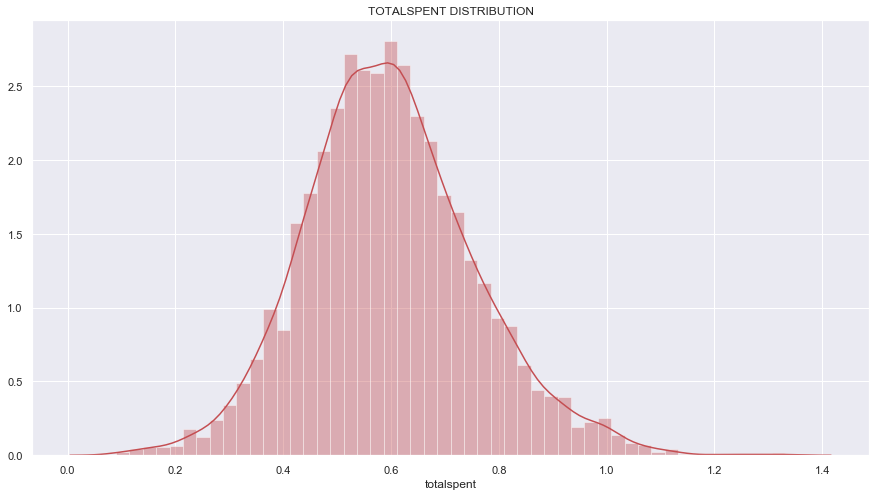

In [18]:
%matplotlib inline

plt.figure(figsize=(15,8))
sns.distplot(np.sqrt(df.totalspent), color='r');
plt.title('TOTALSPENT DISTRIBUTION');

#### `debtinc`

In [19]:
from scipy.stats import pearsonr, spearmanr

corr1, _ = pearsonr(df.totalspent, df.debtinc)
corr2, _ = pearsonr(df.totalspent, np.log(df.debtinc + 1))
corr3, _ = pearsonr(df.totalspent, np.sqrt(df.debtinc))

print(f'Corr between Tota Spent and feature: {np.round(corr1,3)}')
print(f'Corr between Tota Spent and feature with feature log transformed: {np.round(corr2,3)}')
print(f'Corr between Tota Spent and feature with feature square transformed: {np.round(corr2,3)}')

Corr between Tota Spent and feature: 0.016
Corr between Tota Spent and feature with feature log transformed: 0.01
Corr between Tota Spent and feature with feature square transformed: 0.01


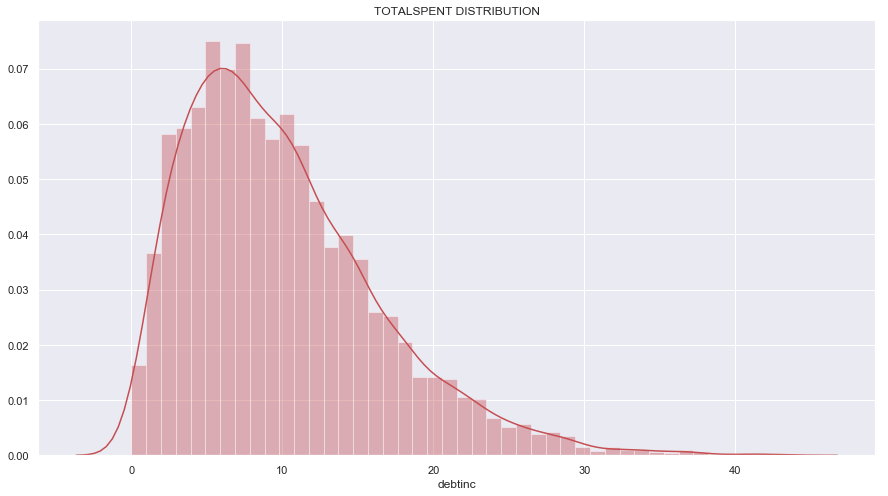

In [20]:
%matplotlib inline

plt.figure(figsize=(15,8))
sns.distplot(df.debtinc, color='r');
plt.title('TOTALSPENT DISTRIBUTION');

#### `creddebt`

In [21]:
corr1, _ = spearmanr(df.totalspent, df.creddebt)
corr2, _ = spearmanr(df.totalspent, np.log(df.creddebt + 1))
corr3, _ = spearmanr(df.totalspent, np.sqrt(df.creddebt))

print(f'Corr between Tota Spent and feature: {np.round(corr1,3)}')
print(f'Corr between Tota Spent and feature with feature log transformed: {np.round(corr2,3)}')
print(f'Corr between Tota Spent and feature with feature square transformed: {np.round(corr2,3)}')

Corr between Tota Spent and feature: 0.245
Corr between Tota Spent and feature with feature log transformed: 0.245
Corr between Tota Spent and feature with feature square transformed: 0.245


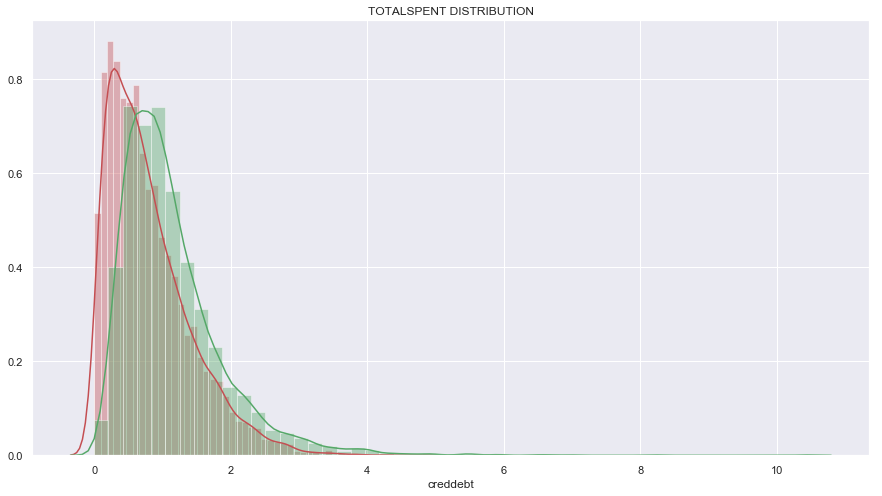

In [22]:
%matplotlib inline

plt.figure(figsize=(15,8))
sns.distplot(np.log(df.creddebt + 1), color='r');
sns.distplot(np.sqrt(df.creddebt), color='g');
plt.title('TOTALSPENT DISTRIBUTION');

#### `othdebt`

In [23]:
corr1, _ = pearsonr(df.totalspent, df.othdebt)
corr2, _ = pearsonr(df.totalspent, np.log(df.othdebt + 1))
corr3, _ = pearsonr(df.totalspent, np.sqrt(df.othdebt))

print(f'Corr between Tota Spent and feature: {np.round(corr1,3)}')
print(f'Corr between Tota Spent and feature with feature log transformed: {np.round(corr2,3)}')
print(f'Corr between Tota Spent and feature with feature square transformed: {np.round(corr2,3)}')

Corr between Tota Spent and feature: 0.278
Corr between Tota Spent and feature with feature log transformed: 0.293
Corr between Tota Spent and feature with feature square transformed: 0.293


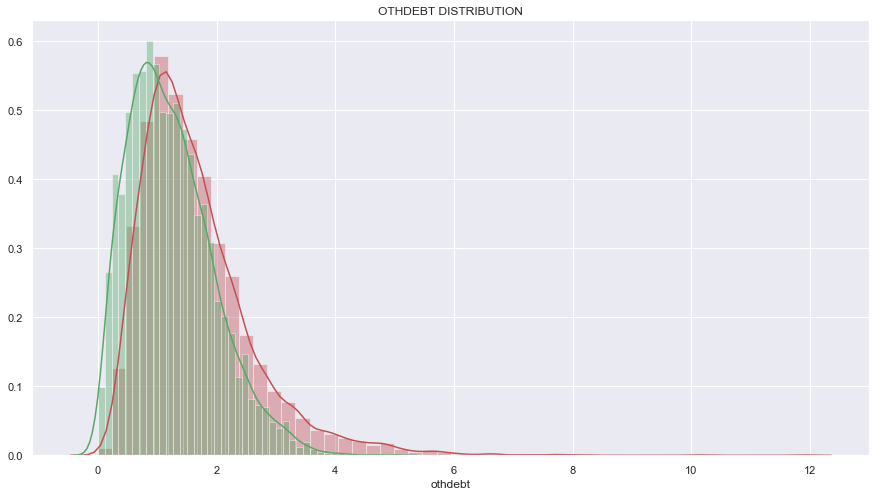

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(np.sqrt(df.othdebt), color='r');
sns.distplot(np.log(df.othdebt + 1), color='g');
plt.title('OTHDEBT DISTRIBUTION');

#### `cardmon`

In [25]:
corr1, _ = pearsonr(df.totalspent, df.cardmon)
corr2, _ = pearsonr(df.totalspent, np.log(df.cardmon + 1))
corr3, _ = pearsonr(df.totalspent, np.sqrt(df.cardmon))

print(f'Corr between Tota Spent and feature: {np.round(corr1,3)}')
print(f'Corr between Tota Spent and feature with feature log transformed: {np.round(corr2,3)}')
print(f'Corr between Tota Spent and feature with feature square transformed: {np.round(corr2,3)}')

Corr between Tota Spent and feature: 0.027
Corr between Tota Spent and feature with feature log transformed: 0.032
Corr between Tota Spent and feature with feature square transformed: 0.032


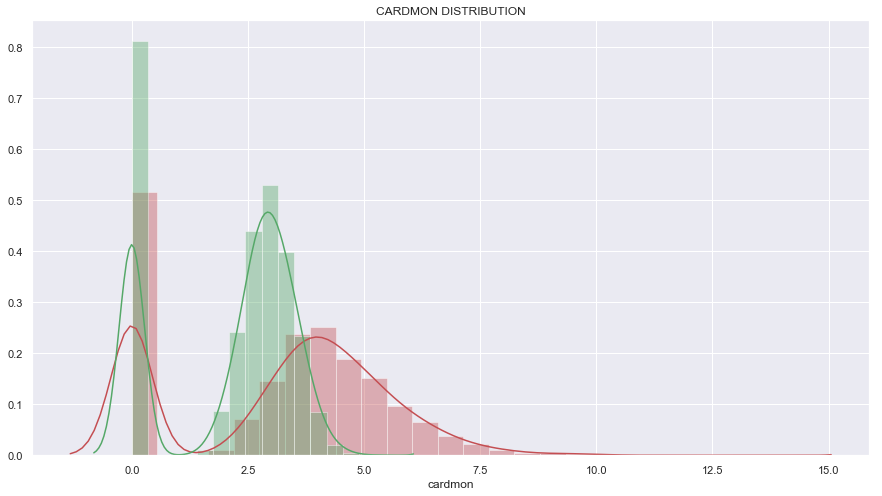

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(np.sqrt(df.cardmon), color='r');
sns.distplot(np.log(df.cardmon + 1), color='g');
plt.title('CARDMON DISTRIBUTION');

In [27]:
# SInce the distribution is not normal dropping feature
# df.drop('cardmon', axis=1, inplace=True)

### `TRANSFORMING NUMERIC FEATURES`

In [28]:
df['creddebt'] = np.sqrt(df.creddebt)
df['othdebt'] = np.log(df.othdebt + 1)
df['cardmon'] = np.log(df.cardmon + 1)

### `NUMERIC FEATURE SCALING`

In [29]:
from sklearn.preprocessing import MinMaxScaler

scale_df = df.drop('totalspent', axis=1)

nmask = scale_df.select_dtypes(['float64', 'int64']).columns.values 

if len(nmask) > 0:
    sc = MinMaxScaler()

    # Scaling numeric features
    train_norm = sc.fit_transform(df[nmask])
    df[nmask] = train_norm

In [30]:
df.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,homeown,hometype,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,active,bfast,churn,tollfree,equip,callcard,cardmon,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,hourstv_day,tenure_yr,commutetime_cat,totalspent
0,1,2,1,2,3,1,1,1,0,2,0.257541,0.104929,0.237062,1,1,0,-1,3,0,0,2,1,2,1,0,1,0,0,8,4,9,6,1,0,1,3,1,1,0,2,0,3,1,1,1,1,0.519523,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,3,0.139292
1,5,5,0,2,4,2,0,1,0,1,0.431555,0.105848,0.190181,1,1,0,-1,2,6,1,3,1,2,1,1,1,0,0,1,1,9,4,1,0,0,2,4,1,0,2,1,1,0,0,1,1,0.540237,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,2,3,3,0.074681
2,3,4,1,6,2,2,0,5,0,2,0.229698,0.092270,0.254706,0,4,1,2,3,3,1,1,5,3,1,1,1,0,1,4,3,2,5,1,0,0,2,1,4,0,5,0,3,0,0,0,1,0.605991,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,3,5,3,0.307463
3,4,3,0,2,3,2,0,1,0,1,0.132251,0.014458,0.151258,1,2,1,4,5,0,1,3,2,3,1,1,1,0,1,1,1,9,3,0,0,0,2,1,4,0,2,1,1,0,0,0,1,0.589400,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,3,4,0.307051
4,2,2,0,3,3,2,0,1,0,1,0.039443,0.044363,0.032750,0,1,1,2,4,0,0,2,2,1,0,1,1,0,1,6,3,9,4,0,0,0,4,2,1,0,3,1,3,0,1,0,1,0.553766,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,3,1,4,0.410672


### `PROFILE REPORT`

In [31]:
# Running Profiling report
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Number of variables,75
Number of observations,4998
Total Missing (%),0.0%
Total size in memory,581.9 KiB
Average record size in memory,119.2 B
Numeric,6
Categorical,69
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [32]:
# List of rejected variables
rejected = profile.get_rejected_variables()
rejected

[]

In [33]:
# Dropping rejected variables if any
if len(rejected) > 0:
    df.drop(columns=rejected, axis=1, inplace=True)

### `NUMERIC AND CATEGORICAL FEATURES`

In [34]:
X = df.drop('totalspent', axis=1)
Y = df.totalspent

var_num = X.select_dtypes(['float', 'int']).columns.values

var_cat = X.select_dtypes('category').columns.values

In [35]:
# Numeric variables 
var_num

array(['debtinc', 'creddebt', 'othdebt', 'cardmon'], dtype=object)

In [36]:
# Categorical variables
var_cat

array(['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat',
       'union', 'empcat', 'retire', 'inccat', 'default', 'jobsat',
       'marital', 'spousedcat', 'reside', 'pets', 'homeown', 'hometype',
       'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue',
       'carbought', 'carbuy', 'commute', 'commutecat', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype',
       'cardbenefit', 'cardfee', 'cardtenurecat', 'active', 'bfast',
       'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward',
       'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda',
       'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01',
       'response_02', 'response_03', 'hourstv_day', 'tenure_yr',
       'commutetime_cat'], dtype=object)

### `FEATURE SELECTION - NUMERIC VARIABLE`

In [37]:
# Pearson correlation 
corr = df.corr('pearson')['totalspent'].sort_values(ascending=False)[1:]

mask = corr[corr >.0].index.values

In [38]:
imp_fea = []

for x in mask:
    imp_fea.append(x)
    
imp_fea

['othdebt', 'creddebt', 'cardmon', 'debtinc']

### `FEATURE SELECTION  - CATAGORICAL FEATURES`

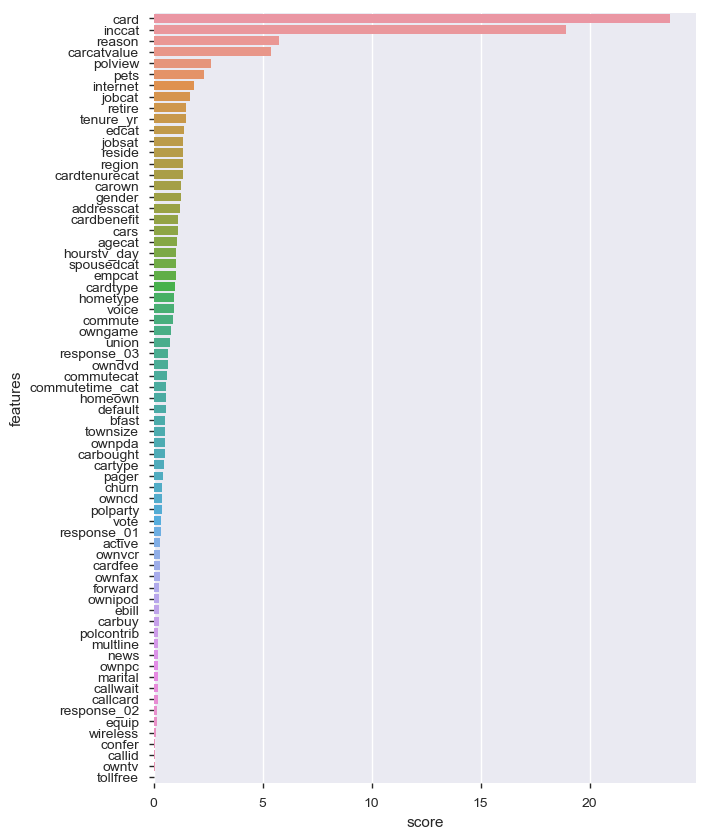

In [39]:
from catboost import CatBoostRegressor

X = df[var_cat]
Y = df.totalspent

cat = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

cat.fit(X, Y)

cat_imp = pd.DataFrame()
cat_imp['features'] = cat.feature_names_ 
cat_imp['score'] = cat.feature_importances_

cat_imp = cat_imp.sort_values(by = 'score', ascending = False)

plt.rcParams['figure.figsize'] = (7, 10)
sns.barplot(y = 'features', x = 'score', data=cat_imp);

In [40]:
mask = cat_imp[cat_imp.score > 2].features.values

for x in mask:
    imp_fea.append(x)
    
mask

array(['card', 'inccat', 'reason', 'carcatvalue', 'polview', 'pets'],
      dtype=object)

### `FEATURE SELECTION - RFE`

In [41]:
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression


lreg = LinearRegression()

rfe = RFE(lreg, 6)
rfe = rfe.fit(X, Y)

In [42]:
rfe_imp = pd.DataFrame()
rfe_imp['feature'] = X.columns.values
rfe_imp['flag'] = rfe.support_

In [43]:
mask = rfe_imp[rfe_imp.flag == True].feature.values
print(mask)

for x in mask:
    imp_fea.append(x)

['gender' 'retire' 'inccat' 'card' 'owndvd' 'response_03']


In [44]:
imp_fea = set(imp_fea)

### `TRAIN TEST SPLIT`

In [45]:
df_new = df[imp_fea]
df_new['totalspent'] = df.totalspent

In [46]:
from sklearn.model_selection import train_test_split

x = df_new.drop('totalspent', axis=1)
y = df_new.totalspent

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

### `FEATURES USED FOR CREDIT SPENT PREDICTION`

In [47]:
print(f'Total number of features selected for credit card spend prediction: {len(imp_fea)}')
print(f'Features List: {imp_fea}')

Total number of features selected for credit card spend prediction: 14
Features List: {'creddebt', 'inccat', 'gender', 'card', 'carcatvalue', 'pets', 'debtinc', 'reason', 'retire', 'owndvd', 'polview', 'othdebt', 'response_03', 'cardmon'}


### `REGRESSION MODELS`

CatBoostRegressor
R2:  0.409
RMSE:  0.155
Time taken by CatBoostRegressor Regressor: 0:00:30.059812
LinearRegression
R2:  0.235
RMSE:  0.176
Time taken by LinearRegression Regressor: 0:00:00.011963
Ridge
R2:  0.234
RMSE:  0.176
Time taken by Ridge Regressor: 0:00:00.013961
GradientBoostingRegressor
R2:  0.392
RMSE:  0.157
Time taken by GradientBoostingRegressor Regressor: 0:00:00.291299


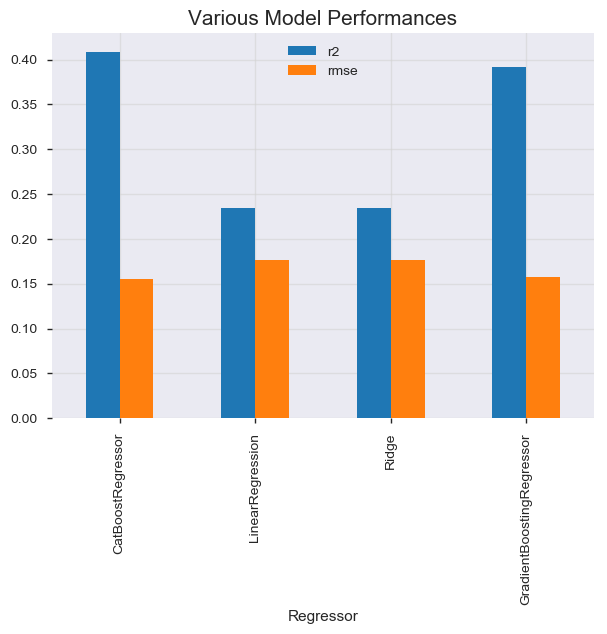

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict
import datetime

Regressors = [CatBoostRegressor(loss_function='RMSE',logging_level='Silent', random_state=0),
             LinearRegression(),
             Ridge(),
             GradientBoostingRegressor(random_state=0)]

# Logging for Visual Comparison
log_cols=["Regressor", "r2", "rmse"]
log = pd.DataFrame(columns=log_cols)

for clf in Regressors:
    print("="*70)
    
    # logging start time
    start = datetime.datetime.now()
    
    # Model fitting
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    # print regressor name
    print(name)
    
    # predictions on test 
    ypred = clf.predict(x_train)
    
    # evaluation metrics
    r2 = np.round(r2_score(y_train, ypred), 3)
    rmse = np.round(np.sqrt(mean_squared_error(y_train, ypred)), 3)
    print('R2: ', r2)
    print('RMSE: ', rmse)
    
    end = datetime.datetime.now()
    
    print(f'Time taken by {name} Regressor: {end-start}')
    
    # Appending to the dataframe
    log_entry = pd.DataFrame([[name, r2, rmse]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*70)

# Various models performance plot
log.set_index('Regressor', inplace=True)

plt.rcParams['figure.figsize'] = (7, 5)
plot = log[['r2', 'rmse']].plot(kind="bar");
plot.set_title("Various Model Performances", fontsize=15);
plot.grid(color='lightgray', alpha=0.6);

### `MAKING PREDICTIONS ON TEST SET`

In [49]:
# Fitting model
from sklearn.model_selection import cross_val_score

reg = CatBoostRegressor(loss_function='RMSE', logging_level='Silent', depth=7, random_state=0)

reg.fit(x_train, y_train)

# Predicted values
ypred = reg.predict(x_test)

# Model evaluation metrics
r2 = np.round(r2_score(y_test, ypred), 3)
rmse = np.round(np.sqrt(mean_squared_error(y_test, ypred)), 3)
bias = np.round((ypred - y_test).mean(), 2)
variance  = np.round((y_test - ypred).std(), 2)

print('*'*70)
print("-- Performance on Test Set")
print('*'*70)

print(f'\nR-Square: {r2}')
print(f'RMSE: {rmse}')

print('*'*70)

**********************************************************************
-- Performance on Test Set
**********************************************************************

R-Square: 0.326
RMSE: 0.163
**********************************************************************


### `RESIDUAL PLOT`

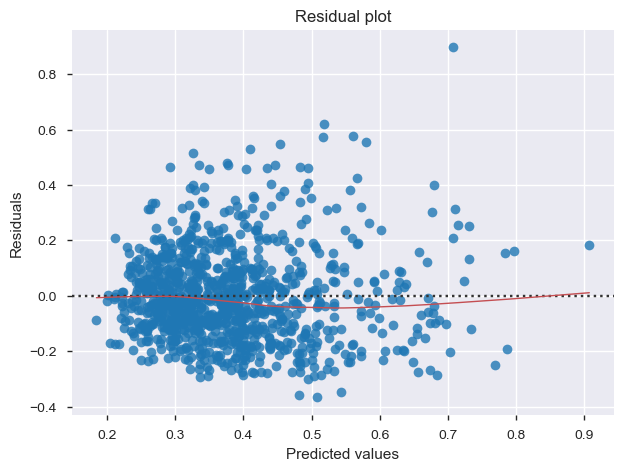

In [50]:
# Residual plot
sns.residplot(ypred, (y_test - ypred) , lowess=True, line_kws={'color':'r', 'lw':1});
plt.title('Residual plot');
plt.xlabel('Predicted values');
plt.ylabel('Residuals');

### `GOODNESS OF FIT`

                     truth      pred
tbin                                
(0.00701, 0.169]  0.115776  0.308452
(0.169, 0.33]     0.253005  0.341536
(0.33, 0.49]      0.400935  0.384002
(0.49, 0.651]     0.558988  0.453308
(0.651, 0.811]    0.708556  0.475826
(0.811, 0.971]    0.875748  0.512601
(0.971, 1.132]    1.024136  0.675172
(1.132, 1.292]    1.140332  0.552652
(1.292, 1.453]         NaN       NaN
(1.453, 1.613]    1.613332  0.707274


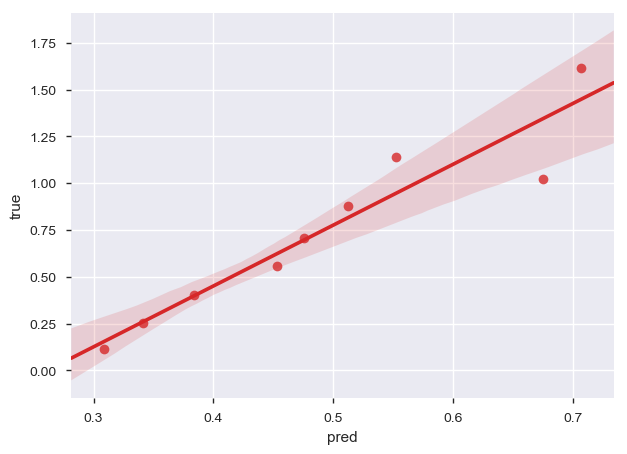

In [51]:
# CHECKING PREDICTION ACCURACY BASED ON TRUE AND PREDICTED VALUES BINS
bb = pd.DataFrame()
bb['truth'] = y_test.astype('float')
bb['pred'] = ypred.astype('float')

# observed - predicted
residual = bb.truth - bb.pred

# Creating 10 bins 
bb['pbin'] = pd.cut(bb.pred, 10)
bb['tbin'] = pd.cut(bb.truth, 10)
bb = bb.sort_values(by='truth')

# Calculating bin average
avg = bb.groupby(bb.tbin).mean()

print(avg)

avg_n = pd.DataFrame(columns=['true', 'pred'])
avg_n['true'] = avg.truth.values
avg_n['pred'] = avg.pred.values

#Plotting bins so locate bins creating bias
sns.regplot(x = 'pred', y = 'true', data = avg_n,color='C3');